169 2089
yes
Joint point at (2120, 4063) pixel
Joint point at (4.999258625605931, 2.1179584844820636) inches
(2120, 4063)
169 2089
yes
Joint point at (2020, 4063) pixel
Joint point at (4.763444539492443, 2.1179584844820636) inches
779 2089
yes
Joint point at (1793, 3670) pixel
Joint point at (4.2281465640148275, 3.0438291011688836) inches
(1793, 3670)
779 2089
yes
Joint point at (1793, 3670) pixel
Joint point at (4.2281465640148275, 3.0438291011688836) inches
-195 2324
yes
Joint point at (2315, 3785) pixel
Joint point at (5.459096093527231, 2.772900040306328) inches
(2315, 3785)
-195 2324
yes
Joint point at (2315, 3785) pixel
Joint point at (5.459096093527231, 2.772900040306328) inches
-182 2454
yes
Joint point at (2274, 3402) pixel
Joint point at (5.362412318220701, 3.675211608222491) inches
(2274, 3402)
-182 2454
yes
Joint point at (2275, 3402) pixel
Joint point at (5.364770459081836, 3.675211608222491) inches
211 2089
yes
Joint point at (2205, 3577) pixel
Joint point at (5.199700598

/tmp/ipykernel_18481/3172112798.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


-195 3690
yes
Joint point at (2160, 3897) pixel
Joint point at (5.093584260051325, 2.50903869407497) inches
152 2089
yes
Joint point at (2532, 3743) pixel
Joint point at (5.970812660393499, 2.8718480451430874) inches
(2532, 3743)
152 2089
yes
Joint point at (2532, 3743) pixel
Joint point at (5.970812660393499, 2.8718480451430874) inches
224 2089
yes
Joint point at (2244, 3091) pixel
Joint point at (5.291668092386655, 4.407898024989923) inches
(2244, 3091)
224 2089
yes
Joint point at (2245, 3091) pixel
Joint point at (5.29402623324779, 4.407898024989923) inches
171 2089
yes
Joint point at (1742, 4067) pixel
Joint point at (4.1078813800969485, 2.108534864973801) inches
(1742, 4067)
171 2089
yes
Joint point at (1742, 4067) pixel
Joint point at (4.1078813800969485, 2.108534864973801) inches
225 2089
yes
Joint point at (2386, 3412) pixel
Joint point at (5.626524094667807, 3.651652559451834) inches
(2386, 3412)
225 2089
yes
Joint point at (2386, 3412) pixel
Joint point at (5.626524094667807,

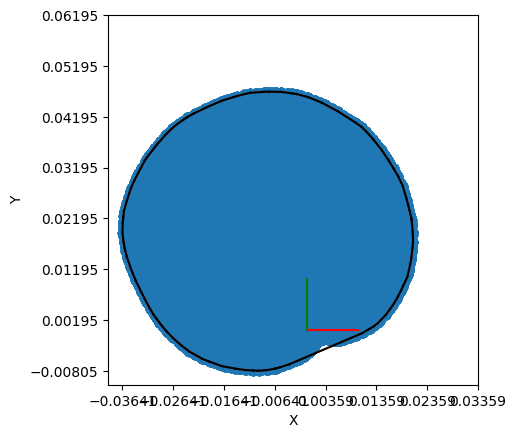

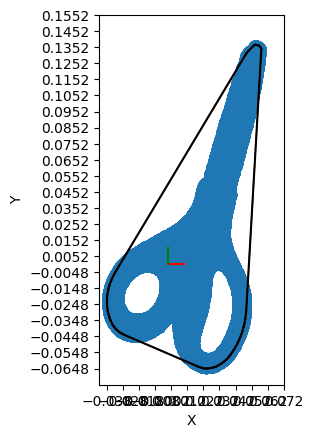

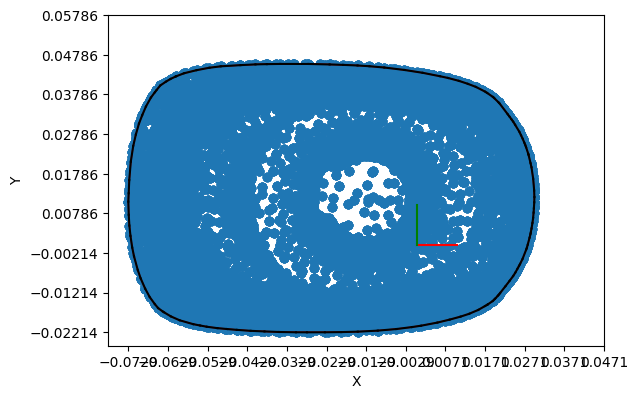

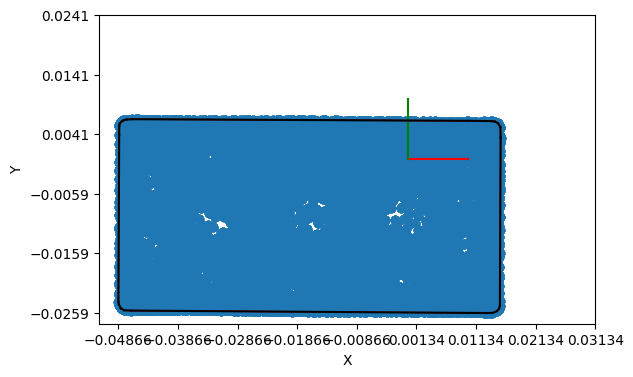

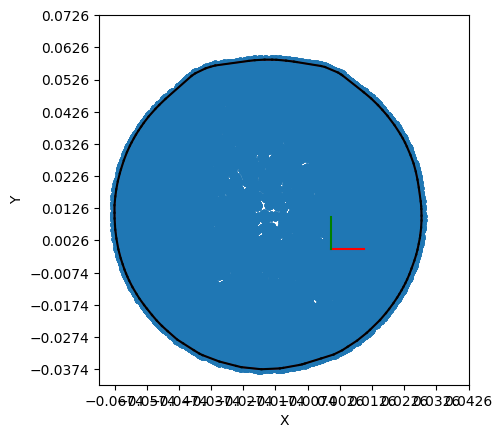

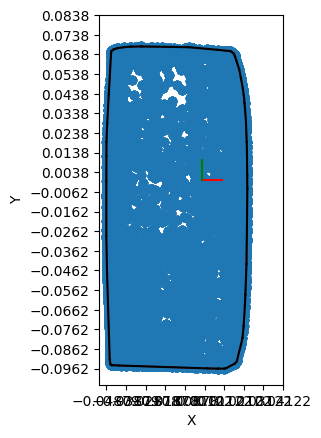

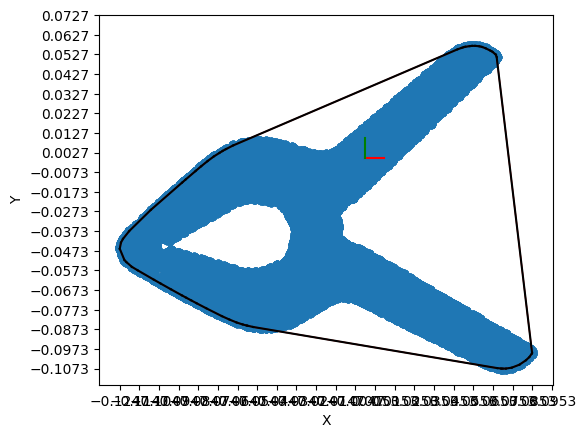

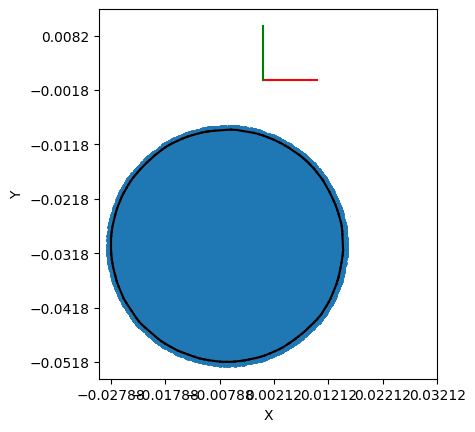

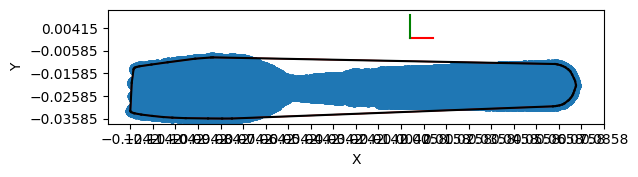

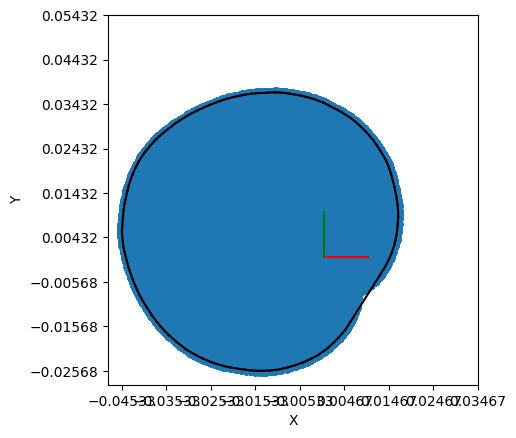

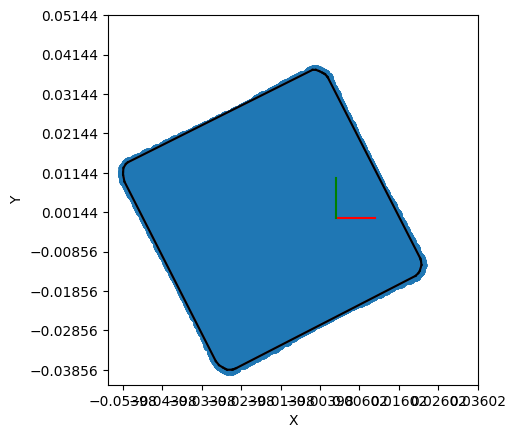

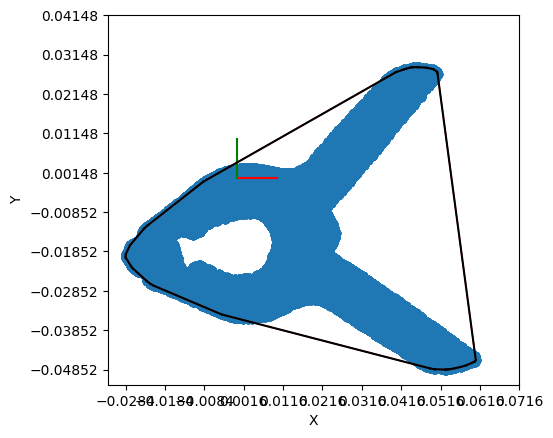

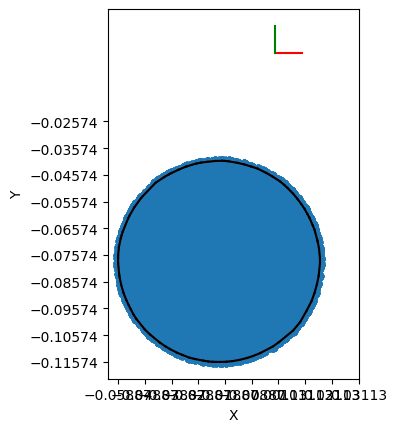

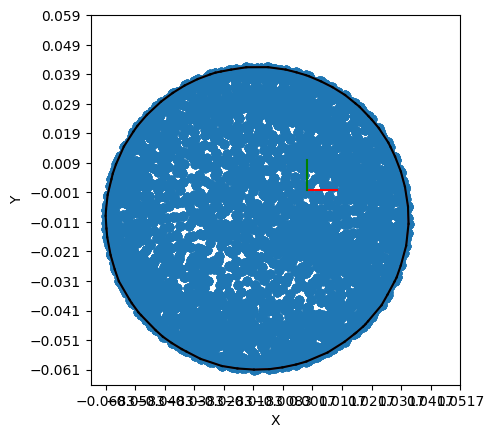

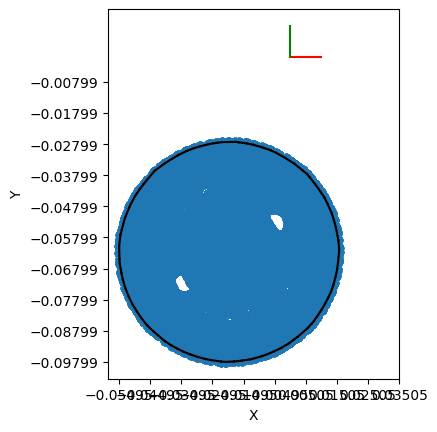

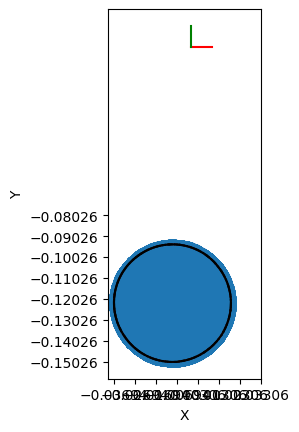

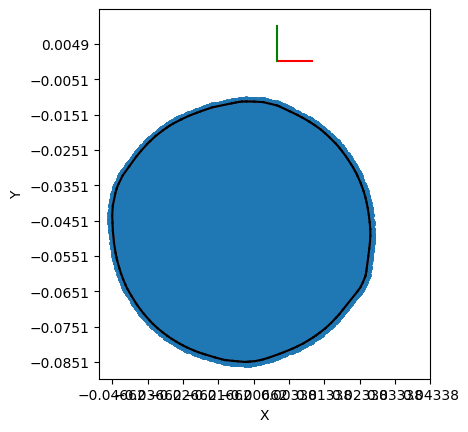

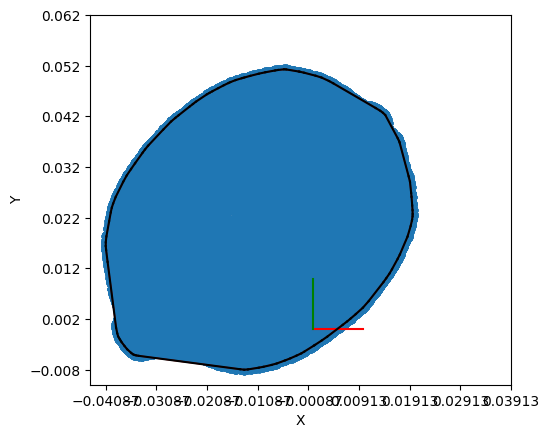

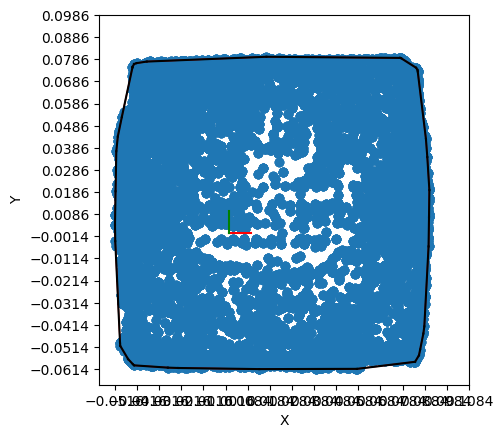

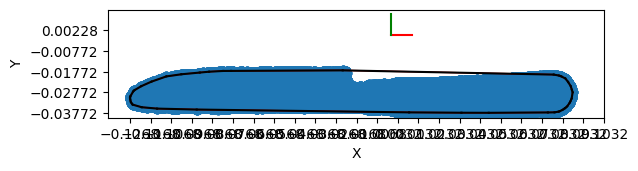

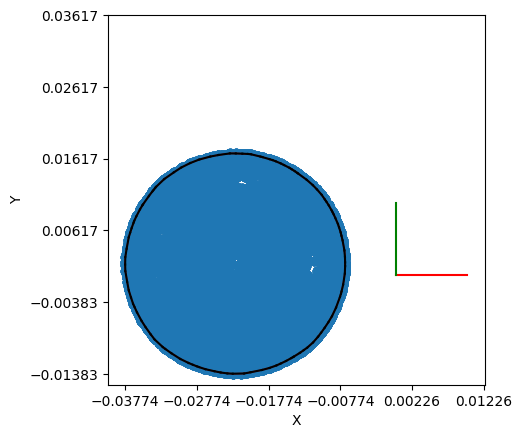

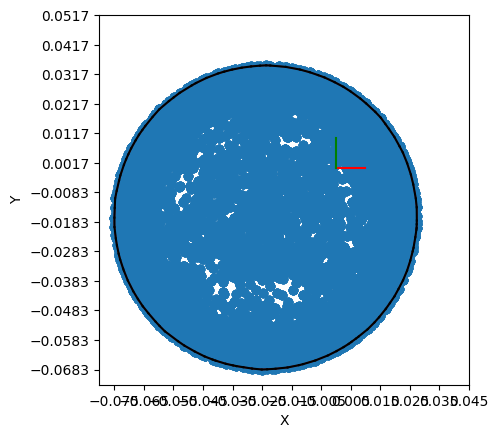

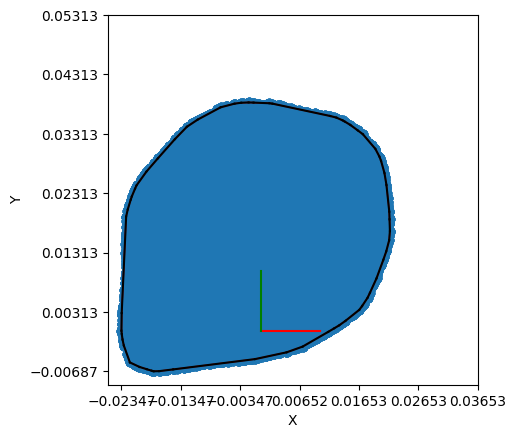

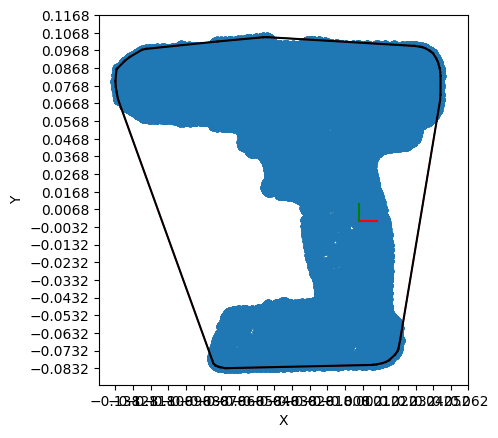

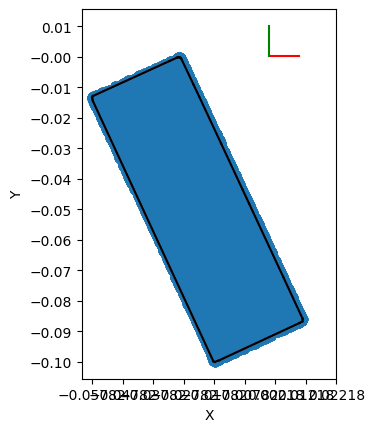

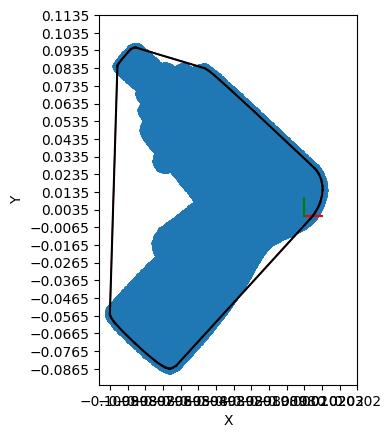

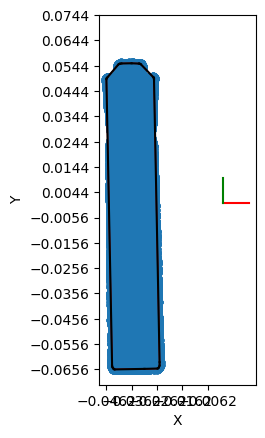

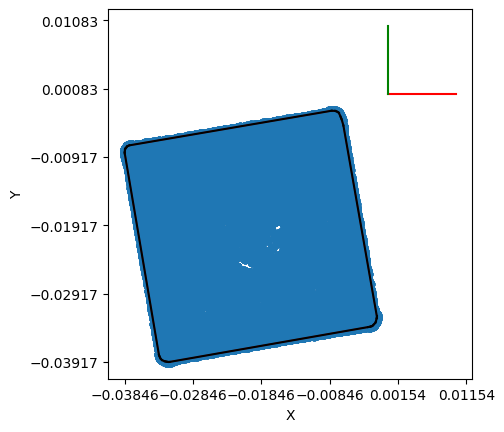

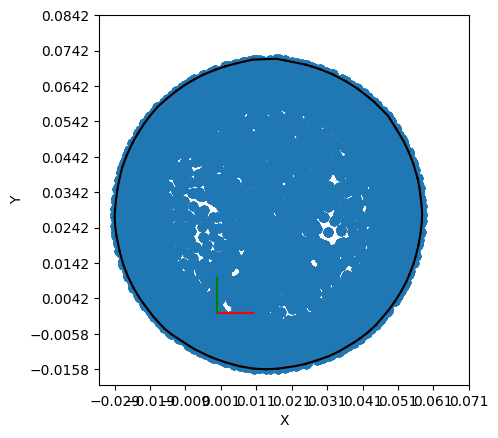

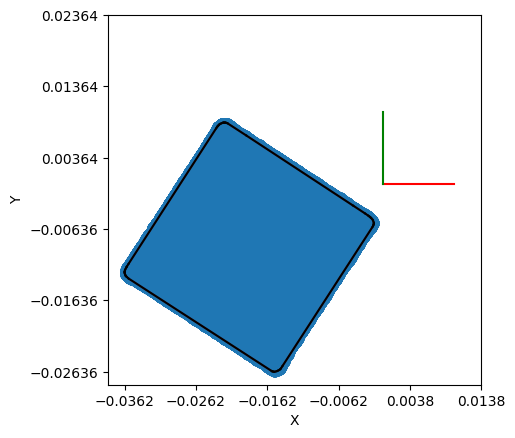

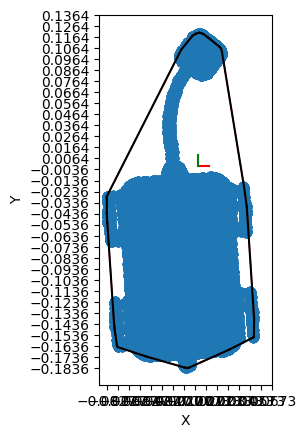

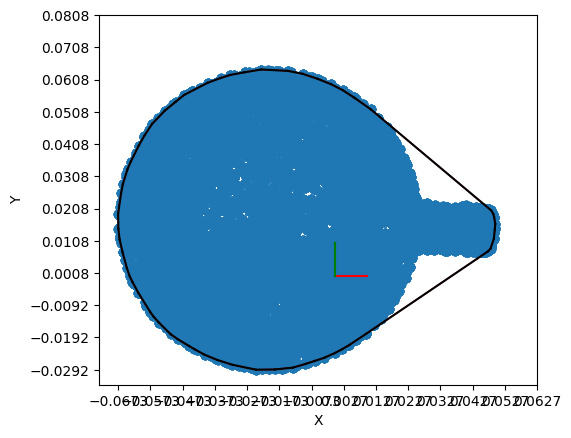

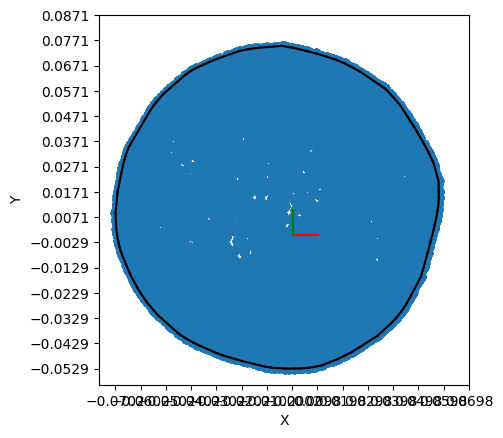

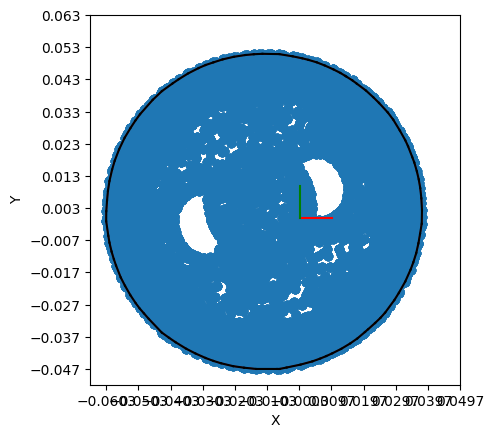

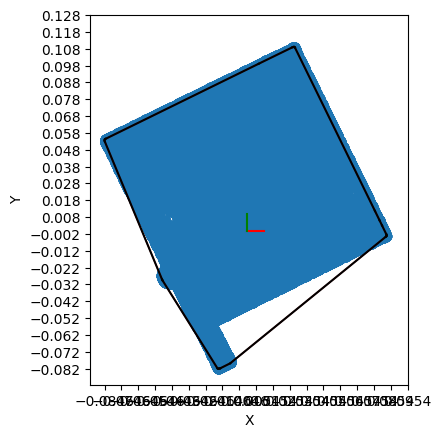

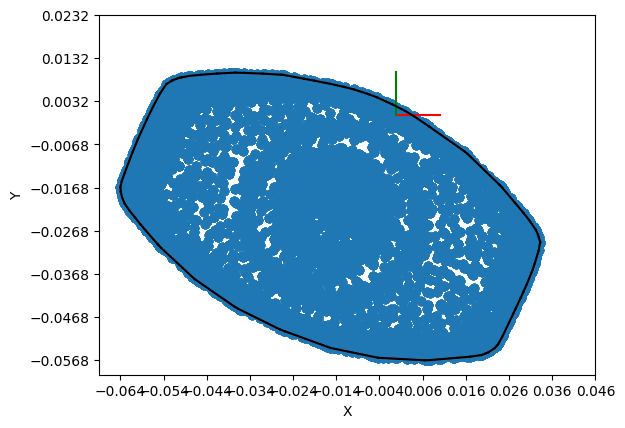

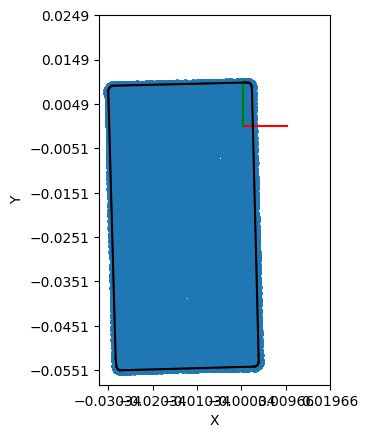

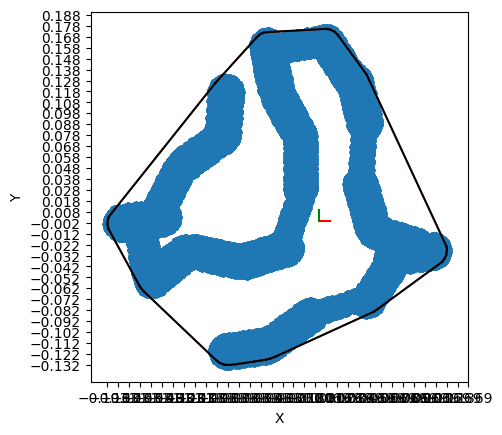

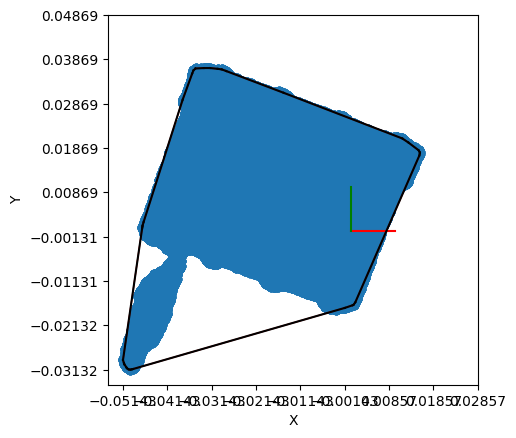

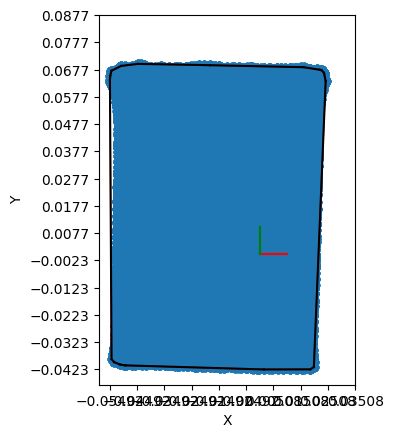

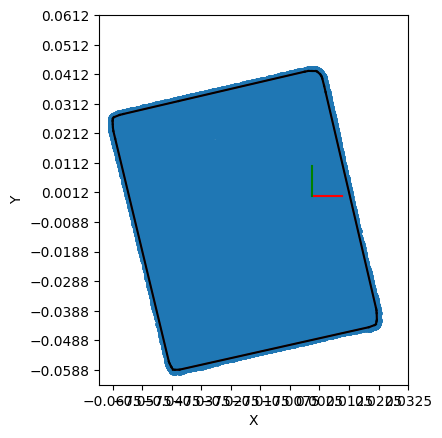

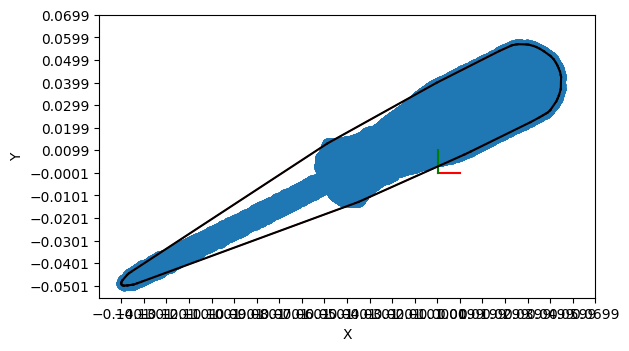

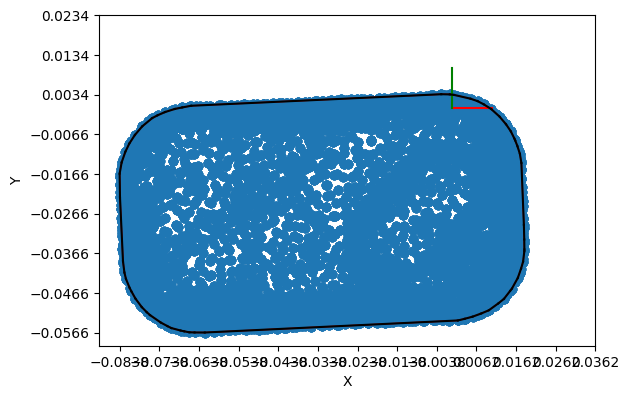

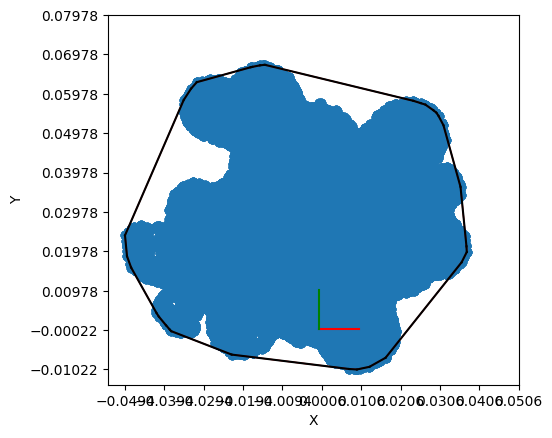

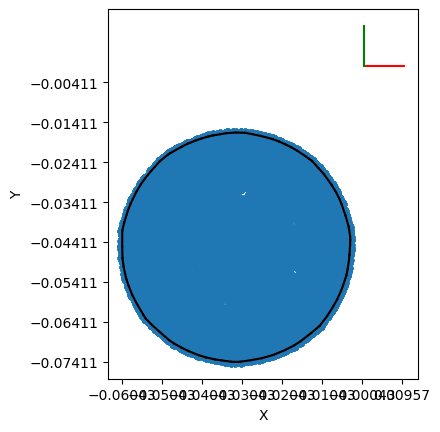

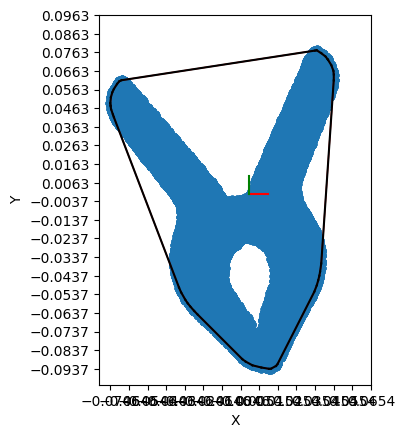

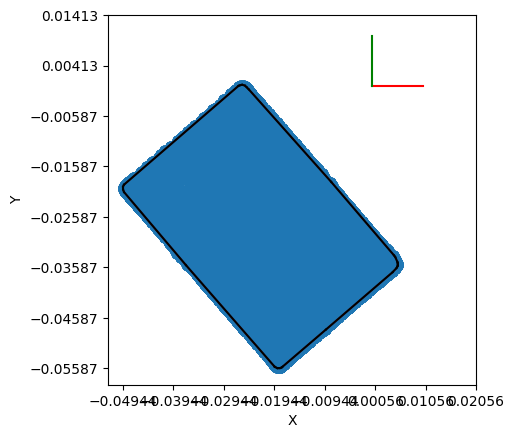

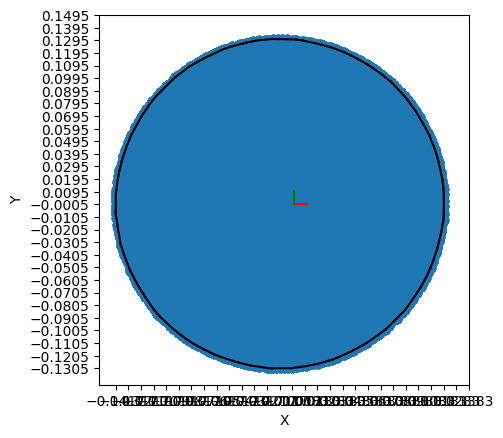

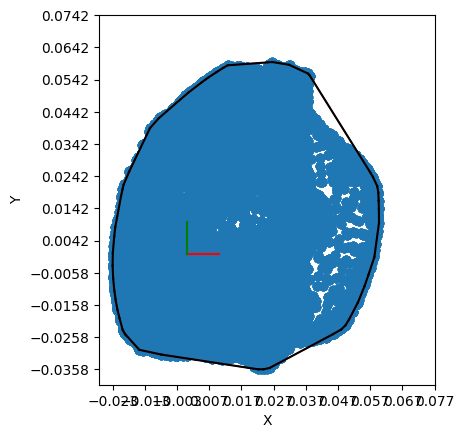

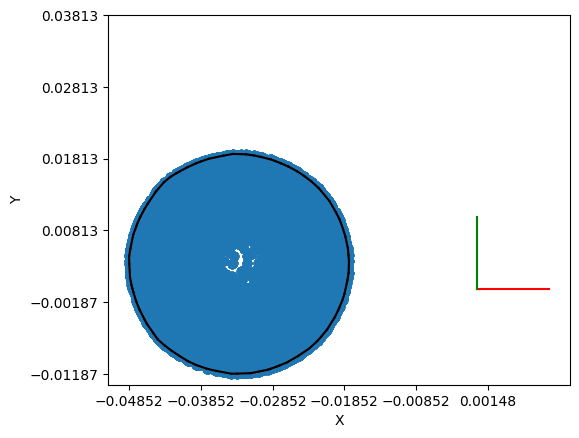

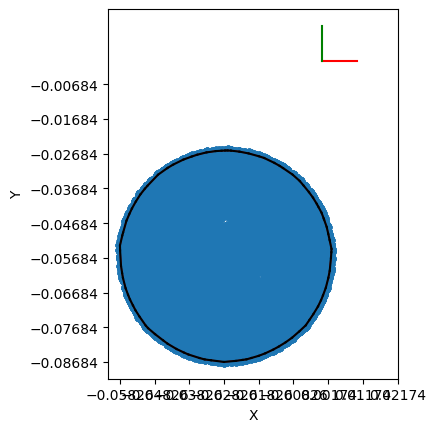

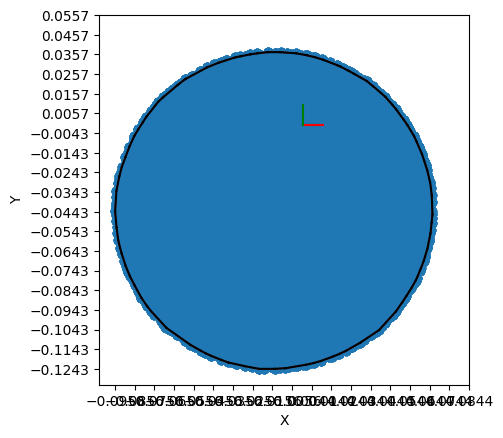

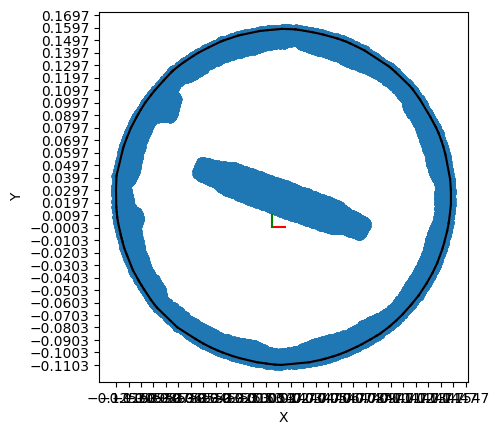

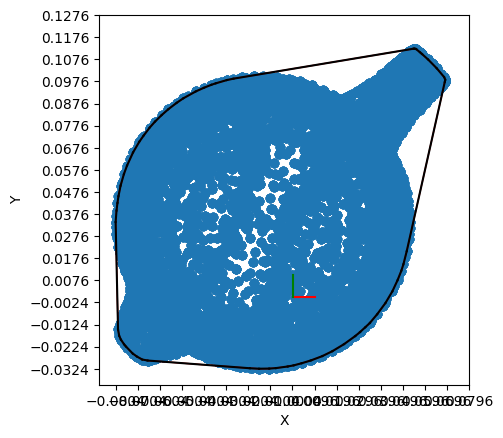

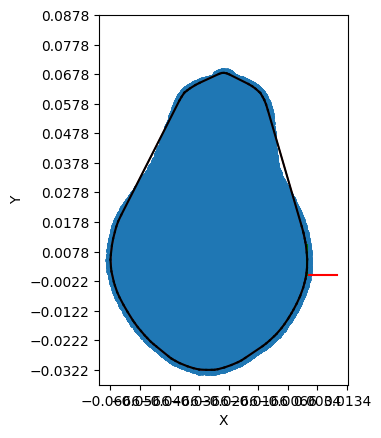

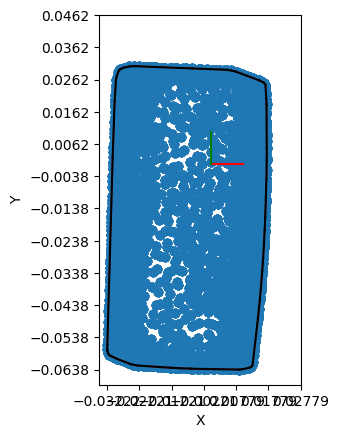

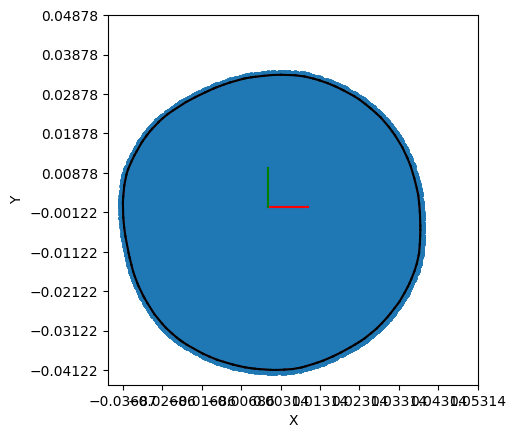

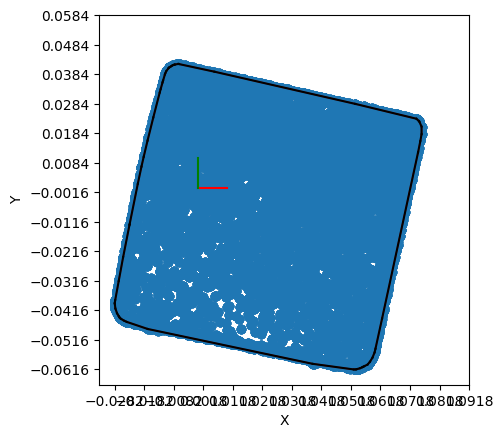

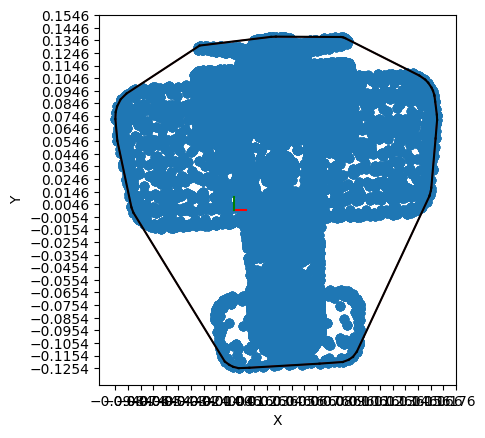

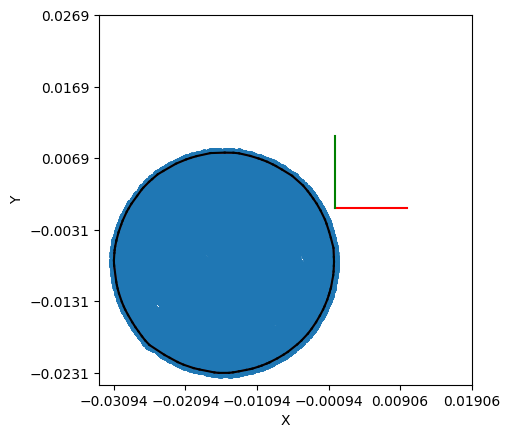

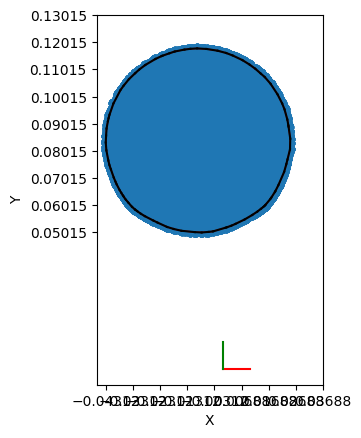

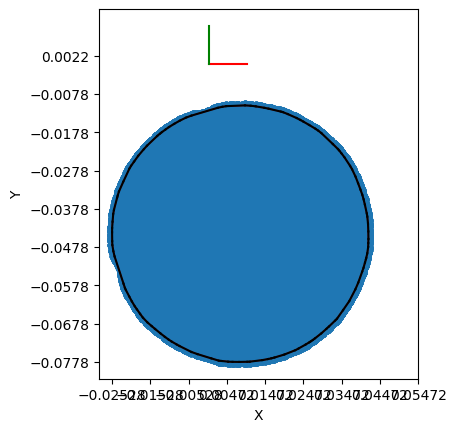

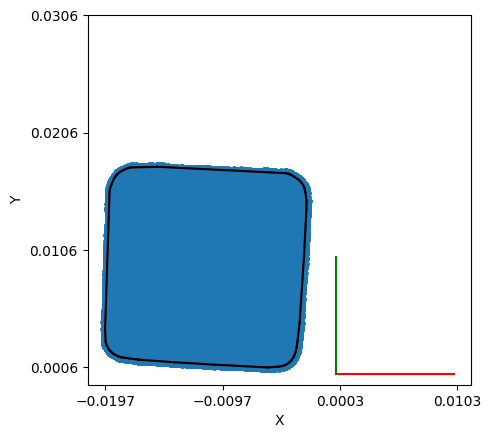

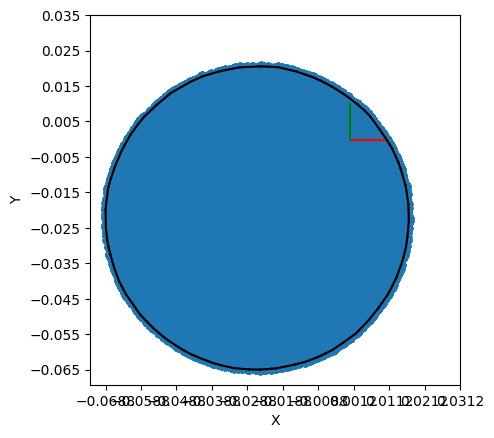

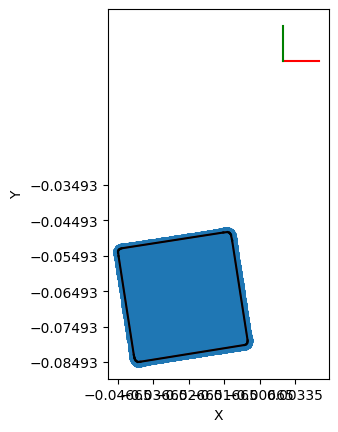

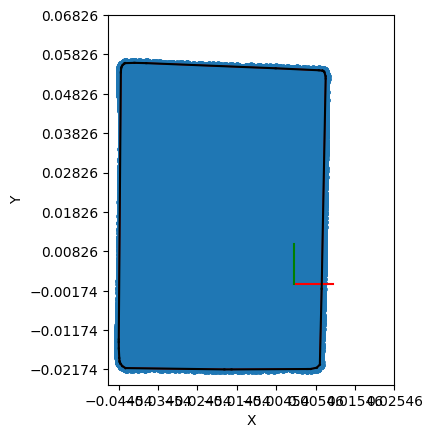

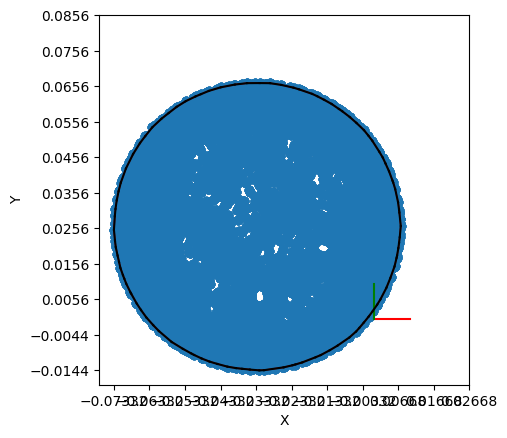

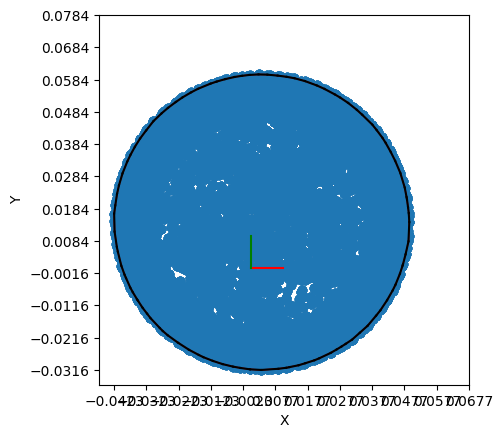

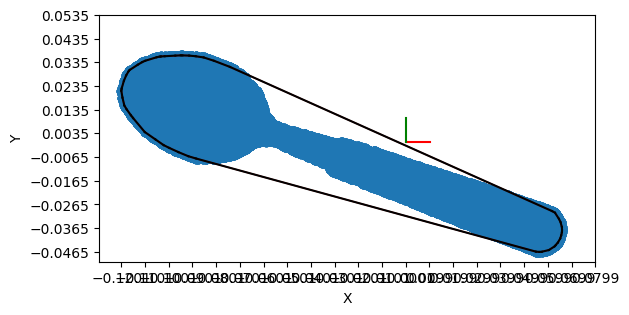

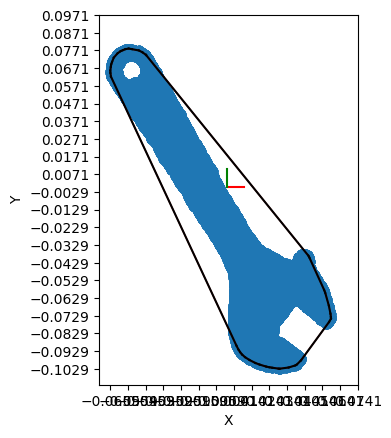

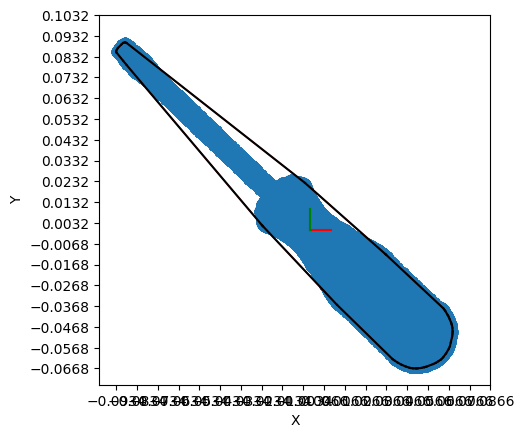

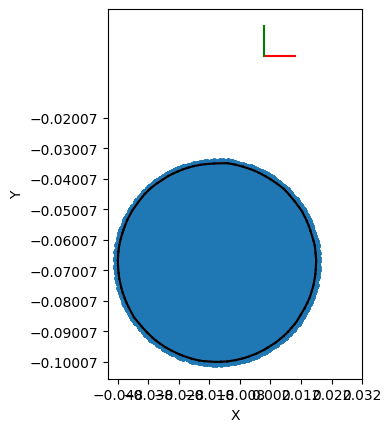

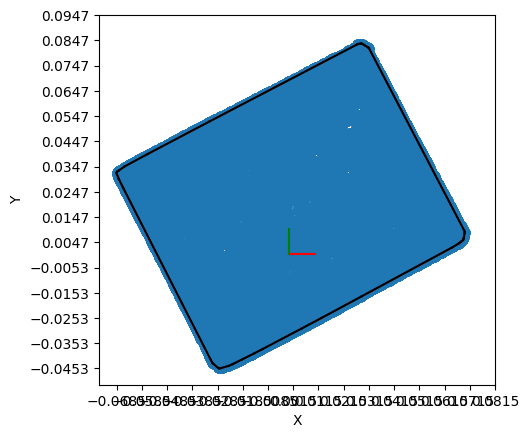

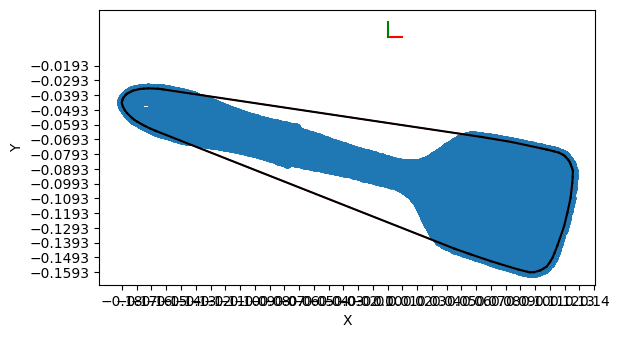

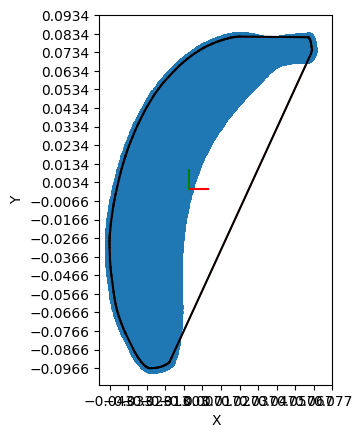

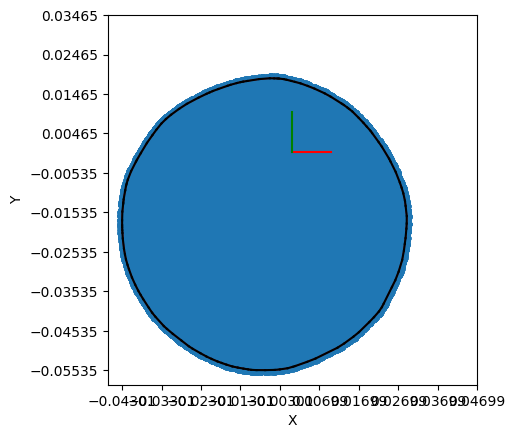

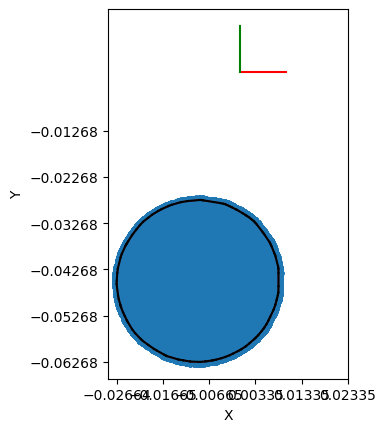

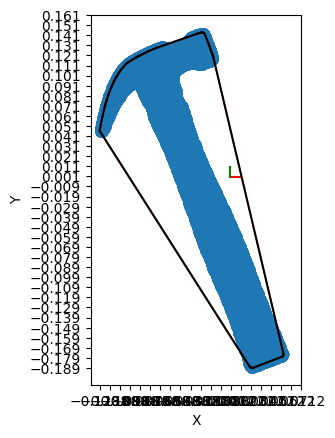

In [1]:
import cv2
import pywavefront
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
from PIL import Image, ImageDraw, ImageFont
import io
import os


# Constants
MARKER_ID = 6
# Replace with your specific 3D object file path from google_16k in YCB models 
# FILE_PATH = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/003_cracker_box/google_16k/textured.obj'
# Save the Arimo zip file on your system and replace the FONT_PATH with yours 
FONT_PATH = "/home/jose/Downloads/Arimo/Arimo-VariableFont_wght.ttf"
# Change the output folder according to your wish.
# OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
FONT_SIZE = 30  # Adjust the size as needed
# New Constants for Font Sizes
TITLE_FONT_SIZE = 40
ANNOTATION_FONT_SIZE = 30
AXES_FONT_SIZE = 30
DISTANCE_CAPTION_FONT_SIZE = 40

PLOT_DPI = 600

# Parameterized values
ARUCO_SIZE = 500  # The size of the ARUCO marke
ARUCO_DICT = cv2.aruco.DICT_4X4_250  # The ARUCO dictionary

# Both for changing plot's position 
PLOT_X_OFFSET = -34  # The offset for the plot's x-position
PLOT_Y_OFFSET = -250  # The offset for the plot's y-position

# Both for changing Marker's position 
MARKER_X_OFFSET = 922  # The offset for the marker's x-position
MARKER_Y_POS = 0  # The y-position of the marker

# Both for changing Black lines's position 
INTERSECTION_X_OFFSET = 400  # The offset for the intersection's x-position
INTERSECTION_Y_OFFSET = 1100  # The offset for the intersection's y-position

X_RANGE = 0.210
Y_RANGE = 0.297
INTERVAL_VALUE = 20
X_AXIS_TEXT_COORDS = (1700, 3000)
Y_AXIS_TEXT_COORDS = (2100, 200)
# Constants for title position
TITLE_X_POS = 200
TITLE_Y_POS = 3150  # Or just calculate the exact position you want


# Additional Constants for annotation positions and increments
ANNOTATION_START_X = 200
ANNOTATION_START_Y = 3200
ANNOTATION_LINE_SPACING = 30

def find_inersection_point(image):
    # Convert to RGB (OpenCV uses BGR by default)
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define range of red and green colors in RGB
    lower_red = np.array([100, 0, 0])
    upper_red = np.array([255, 100, 100])
    lower_green = np.array([0, 100, 0])  # Adjust these values based on your actual green
    upper_green = np.array([100, 255, 100])  
    
    # Threshold the RGB image to get only red and green colors
    mask_red = cv2.inRange(image, lower_red, upper_red)
    mask_green = cv2.inRange(image, lower_green, upper_green)
    
    # Find contours for the red and green lines
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if contours are found, if not, print an error message
    if not contours_red or not contours_green:
        print("No contours found for red or green lines. Check the color thresholds and make sure the lines are visible in the image.")
        # Green_Mask = 'Green Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Green_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Green_Mask, 800, 600)
        # Red_Mask = 'Red Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Red_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Red_Mask, 800, 600)
        # # Show the image
        # window_name = 'Image with joint point'
        # cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(window_name, 800, 600) 
        # cv2.imshow(window_name, image)
        # cv2.imshow('Red Mask', mask_red)
        # cv2.imshow('Green Mask', mask_green)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

    else:
        # Assume the longest contour in each color is the line we want
        red_line = max(contours_red, key=cv2.contourArea)
        green_line = max(contours_green, key=cv2.contourArea)
    
        # Find the endpoints of each line
        red_line_endpoint = tuple(red_line[red_line[:, :, 0].argmin()][0])
        green_line_endpoint = tuple(green_line[green_line[:, :, 0].argmin()][0])
    
        # Now, we find the point closest between the two lines
        # For simplicity, we are assuming that they join at the ends closest to the origin (0,0)
        joint_point = (max(red_line_endpoint[0], green_line_endpoint[0]), max(red_line_endpoint[1], green_line_endpoint[1]))
    
        # Draw a black circle at the joint point
        cv2.circle(image, joint_point, 200, (0,0,0), 2)  # Circle with a thickness of 2 pixels
    
        # Convert joint point to inches
        scaling_factor_x = 8.27 / image.shape[1]
        scaling_factor_y = 11.69 / image.shape[0]
    
        real_world_x = joint_point[0] * scaling_factor_x
        real_world_y = (image.shape[0] - joint_point[1]) * scaling_factor_y  # Convert y-coordinate because image origin (0,0) is at the top-left
        print(f"Joint point at ({joint_point[0]}, {joint_point[1]}) pixel")
        print(f"Joint point at ({real_world_x}, {real_world_y}) inches")
    
        # # Set a window name
        # window_name = 'Image with joint point'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(window_name, 800, 600) 
        # Green_Mask = 'Green Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Green_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Green_Mask, 800, 600)
        # Red_Mask = 'Red Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Red_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Red_Mask, 800, 600)
        # # Show the image
        # cv2.imshow(window_name, image)
        # cv2.imshow('Red Mask', mask_red)
        # cv2.imshow('Green Mask', mask_green)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

    return image,joint_point
        
def add_annotations(draw, annotations, start_x, start_y, line_spacing, font_path, font_size):
    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except OSError:
        font = ImageFont.load_default()

    y_pos = start_y
    for annotation in annotations:
        draw.text((start_x, y_pos), annotation, font=font, fill=(0, 0, 0))
        y_pos += line_spacing
        

def generate_aruco_marker(id, size=ARUCO_SIZE, dictionary=ARUCO_DICT):
    aruco_dict = cv2.aruco.Dictionary_get(dictionary)
    marker_img = cv2.aruco.drawMarker(aruco_dict, id, size)
    return marker_img

def plot_object(file_path):
    scene = pywavefront.Wavefront(file_path)
    items = list(scene.materials.items())
    ver = items[0][1].vertices
    n_ver = int(len(ver)/8)
    v = np.zeros((n_ver,3))
    for i in range(n_ver):
        v[i,:] = ver[8*i+5:8*i+5+3]
    v = v[np.argsort(v[:,2]),:]
    min_z = np.min(v[:1000000, 2])  # Added this line for z-axis minimum value
    max_z = np.max(v[:1000000, 2])  # Added this line for z-axis maximum value
    fig, ax = plt.subplots()
    
    
    ax.scatter(v[:1000000,0],v[:1000000,1])
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.plot([0,0.01],[0,0],c='r')
    ax.plot([0,0],[0,0.01],c='g')
    ax.set_aspect('equal', 'box')

    hull = ConvexHull(v[:1000000, :2])
    for simplex in hull.simplices:
        plt.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-')
    polygon = Polygon(hull.points[hull.vertices], fill=None, edgecolor='r', linewidth=1)
    ax.add_patch(polygon)
    
    points = hull.points[hull.vertices]
    x1, y1 = points[0]
    x2, y2 = points[1]
    m = (y2 - y1) / (x2 - x1)
    angle_with_x_axis = np.degrees(np.arctan(m))
    angle_with_y_axis = 90 - abs(angle_with_x_axis)

    x_ticks = np.arange(min(v[:,0]), max(v[:,0])+0.02, 0.01)
    y_ticks = np.arange(min(v[:,1]), max(v[:,1])+0.02, 0.01)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    return fig, v,angle_with_x_axis, angle_with_y_axis, min_z, max_z
    
def draw_axes_on_a3(a3_img, v, width, height, X_RANGE, Y_RANGE, INTERVAL_VALUE, 
                    X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS):
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(FONT_PATH, size=AXES_FONT_SIZE)  # Try to use Arial font
    except OSError:
        font = ImageFont.load_default()  # If Arial isn't available, use the default PIL font

    draw.line([(0, height - 1), (width, height - 1)], fill=(0, 0, 0))  # X-axis
    draw.line([(0, 0), (0, height)], fill=(0, 0, 0))  # Y-axis
    
    x_min, x_max = min(v[:, 0]), max(v[:, 0])
    y_min, y_max = min(v[:, 1]), max(v[:, 1])

    x_ticks_interval = width // INTERVAL_VALUE
    y_ticks_interval = height // INTERVAL_VALUE

    x_value_interval = X_RANGE / INTERVAL_VALUE
    y_value_interval = Y_RANGE / INTERVAL_VALUE

    x_values_drawn = set()
    y_values_drawn = set()

    x_text_x, x_text_y = X_AXIS_TEXT_COORDS
    y_text_x, y_text_y = Y_AXIS_TEXT_COORDS
    
    draw.text((x_text_x, height - x_text_y), "X-Axis", font=font, fill=(0, 0, 0))
    draw.text((y_text_x, y_text_y), "Y-Axis", font=font, fill=(0, 0, 0))
    

    for i in range(0, width + 1, x_ticks_interval):
        value = x_min-0.07 + (i / width) * X_RANGE
        value_rounded = round(value, 2)
        if value_rounded not in x_values_drawn:
            x_values_drawn.add(value_rounded)
            draw.line([(i, height - 1), (i, height - 20)], fill=(0, 0, 0))
            draw.text((i - 10, height - 40), f"{value_rounded:.2f}", font=font, fill=(0, 0, 0))

    for i in range(0, height + 1, y_ticks_interval):
        value = y_max+0.15 - (i / height) * Y_RANGE
        value_rounded = round(value, 2)
        if value_rounded not in y_values_drawn:
            y_values_drawn.add(value_rounded)
            draw.line([(0, i), (20, i)], fill=(0, 0, 0))
            draw.text((25, i - 10), f"{value_rounded:.2f}", font=font, fill=(0, 0, 0))

    return a3_img

def get_intersection_point():
    return 0, 0

def create_layout_with_annotations(marker_id, file_path, dpi, font_path, marker_x_offset, marker_y_pos, plot_x_offset, plot_y_offset, title_x_pos, title_y_pos, axes_text_coords, interval_value, x_range, y_range, annotation_start_x, annotation_start_y, annotation_line_spacing, annotation_font_size, title_font_size, distance_caption_font_size, intersection_x_offset, intersection_y_offset):
    # Generate ARUCO marker
    marker_img = generate_aruco_marker(marker_id)
    marker_pil_img = Image.fromarray(marker_img)
    marker_pil_img = marker_pil_img.rotate(-90, expand=1)

    # Plot object
    object_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  
    fig, v, angle_with_x_axis, angle_with_y_axis, min_z, max_z = plot_object(file_path)

    # Save plot to PIL image
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    buf.seek(0)
    plot_pil_img = Image.open(buf)
    
    a3_pixel_width = int(11.69 * 300)  # width in pixels
    a3_pixel_height = int( 16.54* 300)  # height in pixels
    a3_img = Image.new('RGB', (a3_pixel_width, a3_pixel_height), (255, 255, 255))

    # Positioning the elements
    marker_x_pos = (a3_pixel_width - marker_pil_img.width) // 2 - plot_pil_img.width // 6 + marker_x_offset
    plot_x_pos = (a3_pixel_width - plot_pil_img.width) // 2 + plot_x_offset
    plot_y_pos = a3_pixel_height - plot_pil_img.height + plot_y_offset 
    print(plot_x_pos,plot_y_pos)

    # Paste elements
    a3_img.paste(marker_pil_img, (marker_x_pos, marker_y_pos))
    a3_img.paste(plot_pil_img, (plot_x_pos, plot_y_pos))

    # Draw title
    draw = ImageDraw.Draw(a3_img)
    try:
        title_font = ImageFont.truetype(font_path, size=title_font_size)
    except OSError:
        title_font = ImageFont.load_default()
    draw.text((title_x_pos, title_y_pos), object_name, font=title_font, fill=(0, 0, 0))

    # Draw axes
    a3_img = draw_axes_on_a3(a3_img, v, a3_pixel_width, a3_pixel_height, x_range, y_range, interval_value, axes_text_coords[0], axes_text_coords[1])

    # Add annotations
    annotations = [
        f"Angle with x-axis (degrees): {angle_with_x_axis:.2f}",
        f"Angle with y-axis (degrees): {angle_with_y_axis:.2f}",
        f"Z Min: {min_z:.6f}",
        f"Z Max: {max_z:.6f}"
    ]
    add_annotations(draw, annotations, annotation_start_x, annotation_start_y, annotation_line_spacing, font_path, annotation_font_size)

    # Calculate intersection point
    intersection_x, intersection_y = get_intersection_point()
    y_scale_factor = plot_pil_img.height / (max(v[:1000000,1]) - min(v[:1000000,1]))
    intersection_pixel_y = (max(v[:1000000, 1]) - intersection_y) * y_scale_factor

    intersection_x_a3 = plot_x_pos + plot_pil_img.width / 2 + intersection_x_offset
    intersection_y_a3 = plot_y_pos + intersection_pixel_y + intersection_y_offset

    # Draw line and text for distance caption
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(font_path, size=distance_caption_font_size)
    except OSError:
        font = ImageFont.load_default()
    draw.line([(intersection_x_a3, intersection_y_a3), (intersection_x_a3, marker_y_pos + marker_pil_img.height)], fill=(0, 0, 0))
    draw.text((intersection_x_a3 + 10, (intersection_y_a3 + marker_y_pos + marker_pil_img.height) / 2), "10 cm", font=font, fill=(0, 0, 0))

    return a3_img

def recreate_layout_with_annotations(marker_id, file_path, dpi, font_path, new_marker_x, marker_y_pos, plot_x_offset, plot_y_offset, title_x_pos, title_y_pos, axes_text_coords, interval_value, x_range, y_range, annotation_start_x, annotation_start_y, annotation_line_spacing, annotation_font_size, title_font_size, distance_caption_font_size, intersection_x_offset, intersection_y_offset):
    # Generate ARUCO marker
    marker_img = generate_aruco_marker(marker_id)
    marker_pil_img = Image.fromarray(marker_img)
    marker_pil_img = marker_pil_img.rotate(-90, expand=1)

    # Plot object
    object_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  
    fig, v, angle_with_x_axis, angle_with_y_axis, min_z, max_z = plot_object(file_path)

    # Save plot to PIL image
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    buf.seek(0)
    plot_pil_img = Image.open(buf)
    
    a3_pixel_width = int(11.69 * 300)  # width in pixels
    a3_pixel_height = int( 16.54* 300)  # height in pixels
    a3_img = Image.new('RGB', (a3_pixel_width, a3_pixel_height), (255, 255, 255))

    # Positioning the elements
    marker_x_pos = new_marker_x[0]
    plot_x_pos = (a3_pixel_width - plot_pil_img.width) // 2 + plot_x_offset
    plot_y_pos = a3_pixel_height - plot_pil_img.height + plot_y_offset 
    print(plot_x_pos,plot_y_pos)

    # Paste elements
    a3_img.paste(marker_pil_img, (marker_x_pos, marker_y_pos))
    a3_img.paste(plot_pil_img, (plot_x_pos, plot_y_pos))

    # Draw title
    draw = ImageDraw.Draw(a3_img)
    try:
        title_font = ImageFont.truetype(font_path, size=title_font_size)
    except OSError:
        title_font = ImageFont.load_default()
    draw.text((title_x_pos, title_y_pos), object_name, font=title_font, fill=(0, 0, 0))

    # Draw axes
    a3_img = draw_axes_on_a3(a3_img, v, a3_pixel_width, a3_pixel_height, x_range, y_range, interval_value, axes_text_coords[0], axes_text_coords[1])

    # Add annotations
    annotations = [
        f"Angle with x-axis (degrees): {angle_with_x_axis:.2f}",
        f"Angle with y-axis (degrees): {angle_with_y_axis:.2f}",
        f"Z Min: {min_z:.6f}",
        f"Z Max: {max_z:.6f}"
    ]
    add_annotations(draw, annotations, annotation_start_x, annotation_start_y, annotation_line_spacing, font_path, annotation_font_size)

    # Calculate intersection point
    intersection_x, intersection_y = get_intersection_point()
    y_scale_factor = plot_pil_img.height / (max(v[:1000000,1]) - min(v[:1000000,1]))
    intersection_pixel_y = (max(v[:1000000, 1]) - intersection_y) #* y_scale_factor

    intersection_x_a3 = marker_x_pos
    intersection_y_a3 = plot_y_pos + intersection_pixel_y + intersection_y_offset

    # Draw line and text for distance caption
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(font_path, size=distance_caption_font_size)
    except OSError:
        font = ImageFont.load_default()

    a3_width_cm = 29.7
    a3_height_cm = 42.0
    
    # Dimensions of the A3 image in pixels
    a3_pixel_width = a3_img.width
    a3_pixel_height = a3_img.height
    
    # Calculate scaling factors for both dimensions (cm/pixel)
    scaling_factor_x = a3_width_cm / a3_pixel_width
    scaling_factor_y = a3_height_cm / a3_pixel_height
    
    # Use the average of the scaling factors for X and Y if they are different
    scaling_factor = (scaling_factor_x + scaling_factor_y) / 2
    bottom_left_x = marker_x_pos
    bottom_left_y = marker_y_pos + marker_pil_img.height
    # Calculate distance
    distance_pixels = np.sqrt((new_marker_x[0] - bottom_left_x)**2 + (new_marker_x[1] - bottom_left_y)**2)
    
    # Convert pixel distance to centimeters
    distance_cm = distance_pixels * scaling_factor
    draw.line([(intersection_x_a3, intersection_y_a3), (intersection_x_a3, marker_y_pos + marker_pil_img.height)], fill=(0, 0, 0))
    draw.text((intersection_x_a3 + 10, (intersection_y_a3 + marker_y_pos + marker_pil_img.height) / 2), str(distance_cm)+" "+ "cm", font=font, fill=(0, 0, 0))

    return a3_img
if __name__ == "__main__":
    # Base directory path
    base_dir = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/'
    # List all directories in the base path
    model_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    # Construct the file path for each model
    for model_dir in model_dirs:
        FILE_PATH = os.path.join(base_dir, model_dir, 'google_16k', 'textured.obj')
        OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
        if os.path.isfile(FILE_PATH):
            a3_img = create_layout_with_annotations(MARKER_ID, FILE_PATH, PLOT_DPI, FONT_PATH, MARKER_X_OFFSET, MARKER_Y_POS, PLOT_X_OFFSET, PLOT_Y_OFFSET, TITLE_X_POS, TITLE_Y_POS, (X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS), INTERVAL_VALUE, X_RANGE, Y_RANGE, ANNOTATION_START_X, ANNOTATION_START_Y, ANNOTATION_LINE_SPACING, ANNOTATION_FONT_SIZE, TITLE_FONT_SIZE, DISTANCE_CAPTION_FONT_SIZE, INTERSECTION_X_OFFSET, INTERSECTION_Y_OFFSET)
            output_pdf_path = OUTPUT_PDF_PATH
            if isinstance(a3_img, Image.Image):
                print("yes")
                a3_img_rgb = a3_img.convert('RGB')
                image_np = np.array(a3_img_rgb)
                new_a3_img,intersection_points = find_inersection_point(image_np)
                pdf_a3_img = Image.fromarray(new_a3_img)
            window_name = 'Image with joint point'
            new_marker_x = intersection_points
            print(new_marker_x)
            pdf_a3_img.save(output_pdf_path, "PDF", resolution=100.0)
            new_a3_img = recreate_layout_with_annotations(MARKER_ID, FILE_PATH, PLOT_DPI, FONT_PATH, new_marker_x,MARKER_Y_POS, PLOT_X_OFFSET, PLOT_Y_OFFSET, TITLE_X_POS, TITLE_Y_POS, (X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS), INTERVAL_VALUE, X_RANGE, Y_RANGE, ANNOTATION_START_X, ANNOTATION_START_Y, ANNOTATION_LINE_SPACING, ANNOTATION_FONT_SIZE, TITLE_FONT_SIZE, DISTANCE_CAPTION_FONT_SIZE, INTERSECTION_X_OFFSET, INTERSECTION_Y_OFFSET)
            if isinstance(new_a3_img, Image.Image):
                print("yes")
                new_a3_img_rgb = new_a3_img.convert('RGB')
                new_image_np = np.array(new_a3_img_rgb)
                next_new_a3_img,new_intersection_points = find_inersection_point(new_image_np)
                new_pdf_a3_img = Image.fromarray(next_new_a3_img)
            new_pdf_a3_img.save(output_pdf_path, "PDF", resolution=100.0)
            plt.close()
